# DV-SOB-ligger-met-veer #

In [1]:
import sympy as sp

In [2]:
w = sp.symbols('w', cls=sp.Function)
q0, x, r = sp.symbols('q0 x r')
L, EI = sp.symbols('L EI')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

In [3]:
DV = sp.Eq(EI*sp.diff(w(x),x,4),q0) 
display(DV)

Eq(EI*Derivative(w(x), (x, 4)), q0)

In [4]:
w = sp.dsolve(DV, w(x)) 
w = w.rhs 
display(w)

C1 + C2*x + C3*x**2 + C4*x**3 + q0*x**4/(24*EI)

In [5]:
phi = -sp.diff(w, x)
kappa = sp.diff(phi, x)
M = EI * kappa
V = sp.diff(M, x)

In [6]:
Eq1 = sp.Eq(w.subs(x, 0), 0) 
Eq2 = sp.Eq(phi.subs(x, 0), 0)
Eq3 = sp.Eq(w.subs(x, L), 0)
Eq4 = sp.Eq(M.subs(x, L), -r*phi.subs(x,L))

In [7]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4),(C1,C2,C3,C4))
display(sol)

{C1: 0,
 C2: 0,
 C3: (6*EI*L**2*q0 + L**3*q0*r)/(96*EI**2 + 24*EI*L*r),
 C4: (-5*EI*L*q0 - L**2*q0*r)/(48*EI**2 + 12*EI*L*r)}

In [8]:
w_sol = w.subs(sol)
phi_sol = phi.subs(sol)
M_sol = M.subs(sol)
V_sol = V.subs(sol)
display(phi_sol.subs(x,0))
display(phi_sol.subs(x,L))
display(w_sol.subs(x,L/2))

0

-3*L**2*(-5*EI*L*q0 - L**2*q0*r)/(48*EI**2 + 12*EI*L*r) - 2*L*(6*EI*L**2*q0 + L**3*q0*r)/(96*EI**2 + 24*EI*L*r) - L**3*q0/(6*EI)

L**3*(-5*EI*L*q0 - L**2*q0*r)/(8*(48*EI**2 + 12*EI*L*r)) + L**2*(6*EI*L**2*q0 + L**3*q0*r)/(4*(96*EI**2 + 24*EI*L*r)) + L**4*q0/(384*EI)

In [9]:
w_subs = w_sol.subs([(EI,10000),(q0,5),(L,8),(r,2000)])
phi_subs = phi_sol.subs([(EI,10000),(q0,5),(L,8),(r,2000)])
M_subs = M_sol.subs([(EI,10000),(q0,5),(L,8),(r,2000)])
V_subs = V_sol.subs([(EI,10000),(q0,5),(L,8),(r,2000)])

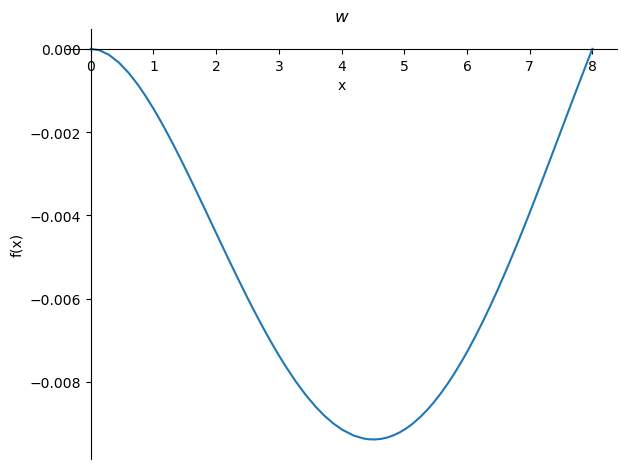

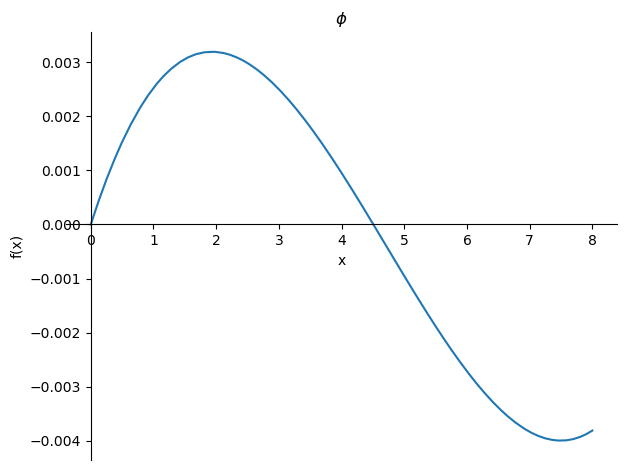

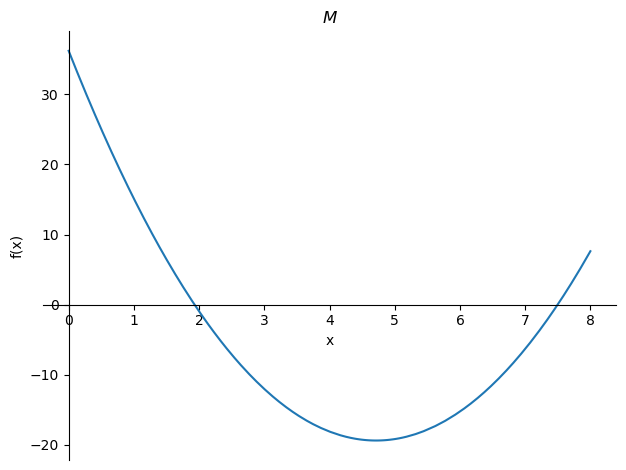

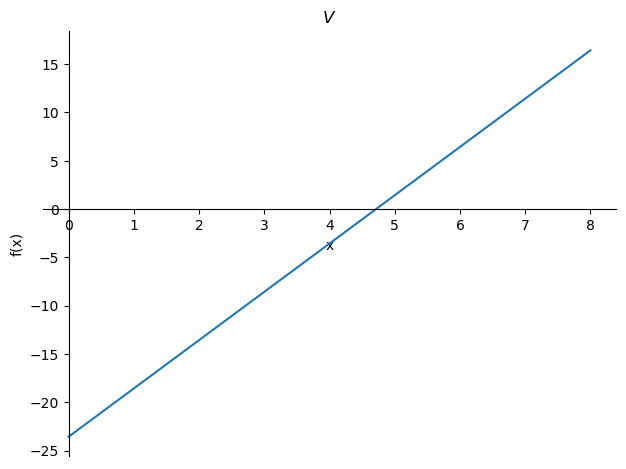

In [10]:
sp.plot(-w_subs,(x,0,8),title='$w$');
sp.plot(-phi_subs,(x,0,8),title='$\phi$');
sp.plot(-M_subs,(x,0,8),title='$M$');
sp.plot(-V_subs,(x,0,8),title='$V$');